# Import

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
df = pd.read_csv("../../results/subset_10h/features_and_wer_10h.csv")
df.head()

,filename,filepath,rms,log_energy,clipping_ratio,crest_factor,snr,hnr,f0,phoneme_entropy,...,hyp_tiny,wer_tiny,hyp_base,wer_base,hyp_small,wer_small,hyp_medium,wer_medium,hyp_large,wer_large
0,common_voice_en_19226640.mp3,audio_files/common_voice_subset_10h/common_voi...,0.138755,7.460141,0.000044,7.206935,32.660786,23.016951,100.887721,5.278837,...,Port maintenance has often exacerbated these p...,0.142857,Poor maintenance has often exacerbated these p...,0.000000,Poor maintenance has often exacerbated these p...,0.000000,Poor maintenance has often exacerbated these p...,0.000000,Poor maintenance has often exacerbated these p...,0.000000
1,common_voice_en_23830464.mp3,audio_files/common_voice_subset_10h/common_voi...,0.111006,7.192654,0.000065,9.008530,21.029661,18.278114,182.299178,5.082705,...,Joel is currently performing with the Joel Han...,0.111111,Joel is currently performing with the Joel Han...,0.111111,Joel is currently performing with the Joel Han...,0.111111,Joel is currently performing with the Joel Han...,0.111111,Joel is currently performing with the Joel Han...,0.111111
2,common_voice_en_25974802.mp3,audio_files/common_voice_subset_10h/common_voi...,0.160976,7.385242,0.000209,6.212097,35.451930,25.376925,102.276770,5.257475,...,"Additionally, Derek's supposed to solve my mem...",0.454545,"Additionally, they are exposed to assault by m...",0.000000,"Additionally, they are exposed to assault by m...",0.000000,"Additionally, they are exposed to assault by m...",0.000000,"Additionally, they are exposed to assault by m...",0.000000
3,common_voice_en_23685836.mp3,audio_files/common_voice_subset_10h/common_voi...,0.148019,7.647268,0.000084,6.755884,30.795628,30.294788,121.143498,4.988149,...,"Landowners converted the properties to test, c...",0.300000,Land owners converted the properties to task s...,0.500000,Landowners converted the properties to pasture...,0.100000,Landowners converted their properties to pastu...,0.000000,Landowners converted the properties to pasture...,0.100000
4,common_voice_en_19002982.mp3,audio_files/common_voice_subset_10h/common_voi...,0.121973,7.459757,0.000017,8.198543,34.396152,20.432310,193.904696,5.484080,...,"At the time of closing, Metrol had quartered a...",0.416667,"At the time of closing, Mietro had quartered i...",0.250000,"At the time of closing, Mitro, Headquartered, ...",0.166667,"At the time of closing, Mitro headquartered in...",0.083333,"At the time of closing, Mitro headquartered in...",0.083333


# Modellierung

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Daten einlesen
df = pd.read_csv("../../results/subset_10h/features_and_wer_10h.csv")

# Feature-Auswahl
exclude_cols = [
    "filename", "filepath", "reference",
    "hyp_tiny", "hyp_base", "hyp_small", "hyp_medium", "hyp_large",
    "wer_tiny", "wer_base", "wer_small", "wer_medium", "wer_large"
]
all_features = df.drop(columns=exclude_cols).select_dtypes(include=np.number).columns
features_filtered = [f for f in all_features if not f.startswith("mfcc_stat_") and not f.startswith("chroma_")]

# X und y
X = df[features_filtered]
y = df["wer_large"]

# NaN-Werte entfernen (wichtig!)
X = X.dropna()
y = y.loc[X.index]

# Split & Skalierung
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelltraining & Evaluation
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))

MSE: 0.024338202404684338
R²: 0.023075133589349206


In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Daten einlesen
df = pd.read_csv("../../results/subset_10h/features_and_wer_10h.csv")

# Feature-Auswahl
exclude_cols = [
    "filename", "filepath", "reference",
    "hyp_tiny", "hyp_base", "hyp_small", "hyp_medium", "hyp_large",
    "wer_tiny", "wer_base", "wer_small", "wer_medium", "wer_large"
]
all_features = df.drop(columns=exclude_cols).select_dtypes(include=np.number).columns
features_filtered = [f for f in all_features if not f.startswith("mfcc_stat_") and not f.startswith("chroma_")]

# X und y
X = df[features_filtered]
y = df["wer_large"]

# NaN-Werte entfernen
X = X.dropna()
y = y.loc[X.index]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelltraining & Evaluation
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))

MSE: 0.02585785367003395
R²: -0.03792300771572554


In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
# Modell-Setup
rf = RandomForestRegressor(random_state=42)

# Parameter-Raster
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
}

# GridSearch
grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

# Fitting
grid_search.fit(X_train, y_train)

# Bestes Modell & Bewertung
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("Best Params:", grid_search.best_params_)
print("MSE:", mean_squared_error(y_test, y_pred_best))
print("R²:", r2_score(y_test, y_pred_best))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
MSE: 0.1352705768520316
R²: 0.031175331966813435


In [33]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
print("Ridge - MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge - R²:", r2_score(y_test, y_pred_ridge))

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
print("Lasso - MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso - R²:", r2_score(y_test, y_pred_lasso))

Ridge - MSE: 0.13437403209351736
Ridge - R²: 0.03759649685172817
Lasso - MSE: 0.13676536007012174
Lasso - R²: 0.02046950895083044


In [34]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgb = HistGradientBoostingRegressor()
hgb.fit(X_train, y_train)
y_pred_hgb = hgb.predict(X_test)
print("HGB - MSE:", mean_squared_error(y_test, y_pred_hgb))
print("HGB - R²:", r2_score(y_test, y_pred_hgb))

HGB - MSE: 0.13468249861319712
HGB - R²: 0.03538722133533123


In [35]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)
print("SVR - MSE:", mean_squared_error(y_test, y_pred_svr))
print("SVR - R²:", r2_score(y_test, y_pred_svr))

SVR - MSE: 0.14206275900217966
SVR - R²: -0.01747111998139017


# Neuronales Netz

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
exclude_cols = [
    "filename", "filepath", "reference",
    "hyp_tiny", "hyp_base", "hyp_small", "hyp_medium", "hyp_large",
    "wer_tiny", "wer_base", "wer_small", "wer_medium", "wer_large"
]
features = df.drop(columns=exclude_cols).select_dtypes(include=np.number).columns

X = df[features]
y = df["wer_tiny"]

# Fehlende Werte entfernen
X = X.dropna()
y = y[X.index]

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# In Torch-Tensoren konvertieren
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [39]:
model = nn.Sequential(
    nn.Linear(X_train.shape[1], 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

In [40]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)
    
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 0.1019
Epoch 10, Loss: 0.0803
Epoch 20, Loss: 0.0735
Epoch 30, Loss: 0.0677
Epoch 40, Loss: 0.0619
Epoch 50, Loss: 0.0555
Epoch 60, Loss: 0.0488
Epoch 70, Loss: 0.0422
Epoch 80, Loss: 0.0358
Epoch 90, Loss: 0.0300


In [41]:
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor).numpy()

mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("MSE:", mse)
print("R²:", r2)

MSE: 0.13625858012435282
R²: 0.024099129849560863


# Binär

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
# CSV laden
df = pd.read_csv("../../results/subset_10h/features_and_wer_10h.csv")

# NaNs entfernen
df_clean = df.dropna()

# Zielvariable: 1 wenn WER == 0, sonst 0
y = (df_clean["wer_tiny"] == 0).astype(int)

# Relevante numerische Features extrahieren (ohne MFCC/Chroma/Hypothesen)
exclude_cols = [
    "filename", "filepath", "reference",
    "hyp_tiny", "hyp_base", "hyp_small", "hyp_medium", "hyp_large",
    "wer_tiny", "wer_base", "wer_small", "wer_medium", "wer_large"
]
features = df_clean.drop(columns=exclude_cols).select_dtypes(include=np.number).columns
X = df_clean[features]

In [53]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisierung
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy: 0.623541887592789

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.61      0.67       600
           1       0.49      0.65      0.56       343

    accuracy                           0.62       943
   macro avg       0.62      0.63      0.62       943
weighted avg       0.66      0.62      0.63       943



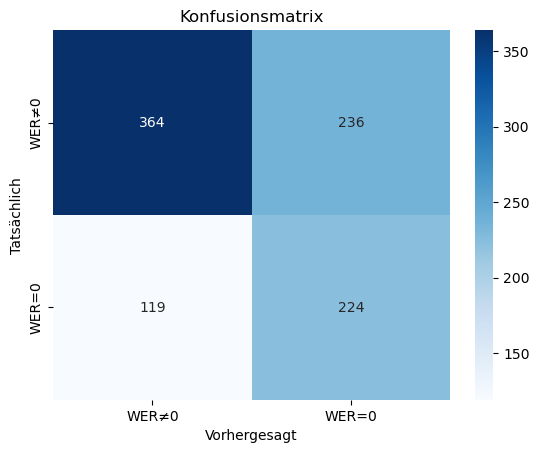

In [57]:
# Modell
clf = LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced")
clf.fit(X_train_scaled, y_train)

# Vorhersage
y_pred = clf.predict(X_test_scaled)

# Bewertung
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Konfusionsmatrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["WER≠0", "WER=0"], yticklabels=["WER≠0", "WER=0"])
plt.xlabel("Vorhergesagt")
plt.ylabel("Tatsächlich")
plt.title("Konfusionsmatrix")
plt.show()

In [55]:
print(y.value_counts(normalize=True))

wer_tiny
0    0.621473
1    0.378527
Name: proportion, dtype: float64


# Random Forest

In [58]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [59]:
# Zielvariable: ob WER exakt 0 ist
df["wer_zero"] = (df["wer_tiny"] == 0).astype(int)

# Feature-Auswahl (ohne Strings und WER-Spalten)
exclude_cols = [
    "filename", "filepath", "reference",
    "hyp_tiny", "hyp_base", "hyp_small", "hyp_medium", "hyp_large",
    "wer_tiny", "wer_base", "wer_small", "wer_medium", "wer_large",
    "wer_zero"
]
features = df.drop(columns=exclude_cols).select_dtypes(include=np.number).columns
X = df[features]
y = df["wer_zero"]

In [60]:
# Fehlende Werte entfernen
X = X.dropna()
y = y.loc[X.index]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalierung
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
clf_rf = RandomForestClassifier(random_state=42, class_weight="balanced")
clf_rf.fit(X_train_scaled, y_train)

y_pred_rf = clf_rf.predict(X_test_scaled)

In [62]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.6362672322375398

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.91      0.76       591
           1       0.54      0.18      0.27       352

    accuracy                           0.64       943
   macro avg       0.59      0.54      0.52       943
weighted avg       0.61      0.64      0.58       943



In [63]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# SMOTE anwenden
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Modell trainieren
clf_rf_smote = RandomForestClassifier(random_state=42)
clf_rf_smote.fit(X_resampled, y_resampled)

# Vorhersage
y_pred_rf_smote = clf_rf_smote.predict(X_test_scaled)

# Bewertung
print("Accuracy:", accuracy_score(y_test, y_pred_rf_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_smote))

/opt/homebrew/Caskroom/miniconda/base/envs/ma-env/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Accuracy: 0.6277836691410392

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.76      0.72       591
           1       0.50      0.40      0.45       352

    accuracy                           0.63       943
   macro avg       0.59      0.58      0.58       943
weighted avg       0.61      0.63      0.62       943



# Automatischer Ansatz

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from lazypredict.Supervised import LazyRegressor
from tqdm import tqdm
import lazypredict.Supervised
lazypredict.Supervised.tqdm_notebook = tqdm  # Workaround für JupyterLab

In [5]:
# CSV laden
df = pd.read_csv("../../results/subset_10h/features_and_wer_10h.csv")

# Ziel definieren (z. B. wer_tiny)
y = df["wer_tiny"]

# Spalten ausschließen
exclude_cols = [
    "filename", "filepath", "reference",
    "hyp_tiny", "hyp_base", "hyp_small", "hyp_medium", "hyp_large",
    "wer_tiny", "wer_base", "wer_small", "wer_medium", "wer_large"
]

# Feature-Matrix
X = df.drop(columns=exclude_cols).select_dtypes(include=np.number)

# Fehlende Werte entfernen
X = X.dropna()
y = y.loc[X.index]

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [7]:
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

models.head(10)  # zeige die Top 10 Modelle

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 30600
[LightGBM] [Info] Number of data points in the train set: 3771, number of used features: 120
[LightGBM] [Info] Start training from score 0.206390


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.02,0.14,0.35,5.98
HistGradientBoostingRegressor,-0.01,0.12,0.35,2.51
LGBMRegressor,-0.02,0.11,0.35,0.64
RandomForestRegressor,-0.03,0.10,0.35,50.04
SVR,-0.03,0.10,0.35,0.90
ElasticNetCV,-0.04,0.09,0.36,0.51
LassoCV,-0.04,0.09,0.36,0.51
LassoLarsIC,-0.04,0.09,0.36,0.05
LassoLarsCV,-0.04,0.09,0.36,0.08


# Pycaret

In [8]:
from pycaret.regression import *

# Setup – Zielvariable definieren
reg_setup = setup(data=df, target='wer_tiny', session_id=42,
                  normalize=True, silent=True, verbose=False)

# Modelle vergleichen
best_model = compare_models()

# Details anzeigen
print(best_model)

ImportError: cannot import name '_print_elapsed_time' from 'sklearn.utils' (/opt/homebrew/Caskroom/miniconda/base/envs/ma-env/lib/python3.9/site-packages/sklearn/utils/__init__.py)